<a href="https://colab.research.google.com/github/ProData-Emmanuel/Global-Comsumption/blob/main/Okeke_Hamoye_StgE_Regressin_Clustering_Time_Series_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##PROJECT TITLE: Household Electric Power Consumption

### OBJECTIVE: Apply Time Series Analysis- Regression / Clustering, to Predict Household Electric Power Consumption.

**Method:** 
+ Predict the active power consumption for the next N minutes given the consumption for the p former minutes. p is a hyper parameter of the model ( window width )
+ Make Predictions usind Traditional Machine learning algorithms, AR, ARIMA, SARIMAX
* Make Predictions using Deep Neural Network, RNN
+ Conclude by drawing comparisons of the models

**Data Link:** https://archive.ics.uci.edu/ml/datasets/individual+household+electric+power+consumption


**Using URL Python Library to Download the Zipped file to our wrking Directory**

```
`# This is formatted as code`
```



In [1]:
# Download the Data

from urllib.request import urlretrieve
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00235/household_power_consumption.zip'
filename = 'household_power_consumption'
urlretrieve(url, filename)

('household_power_consumption', <http.client.HTTPMessage at 0x7f2f2f1c77f0>)

## **Unzip the file**

In [2]:
# Downloaded data is in zip format, so Unzip the File by uncommenting this code
!unzip household_power_consumption

Archive:  household_power_consumption
  inflating: household_power_consumption.txt  


In [3]:
import pandas as pd
import numpy as np


In [4]:
#Load the text file dataset
#df = pd.read_csv('household_power_consumption.txt', sep=';', low_memory=False)

In [5]:
#Load the text file dataset
df = pd.read_csv('household_power_consumption.txt', sep = ';', header=0, low_memory=False, infer_datetime_format=True, parse_dates={'datetime':[0,1]}, index_col=['datetime'],na_values = '?', dtype = float)

In [6]:
#Preview the dataset
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [7]:
#pip install pandas_profiling

In [8]:
#import pandas_profiling as pp
#report = pp.ProfileReport(df)
#report

In [9]:
pip install statsmodels

In [10]:
pip install statsmodels --upgrade

     |████████████████████████████████| 9.5MB 12.0MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [11]:

#Import processing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import os, warnings, gc
import scipy.stats as stats
import random
seed = 4092
random.seed(seed)
np.random.seed(seed)
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, LabelEncoder

warnings.filterwarnings('ignore')

#Time series libraries
from scipy import stats
from pandas.plotting import lag_plot, autocorrelation_plot
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.graphics.tsaplots import pacf, plot_acf,plot_pacf
from pandas.plotting import autocorrelation_plot
import statsmodels.api as sm
from statsmodels.tsa.arima_model import  ARIMA
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
from statsmodels.tsa.statespace.sarimax import SARIMAX

#Modelling libaries
import keras
from keras.models import Sequential
from keras.layers import Dropout, Dense, LSTM
from keras.callbacks import EarlyStopping
%matplotlib inline

## EDA and Features Engineering

In [12]:
#Dataframe datatypes
df.dtypes

Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtype: object

In [13]:
df.columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [14]:
df.shape

(2075259, 7)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 126.7 MB


In [16]:
df.values

array([[  4.216,   0.418, 234.84 , ...,   0.   ,   1.   ,  17.   ],
       [  5.36 ,   0.436, 233.63 , ...,   0.   ,   1.   ,  16.   ],
       [  5.374,   0.498, 233.29 , ...,   0.   ,   2.   ,  17.   ],
       ...,
       [  0.938,   0.   , 239.82 , ...,   0.   ,   0.   ,   0.   ],
       [  0.934,   0.   , 239.7  , ...,   0.   ,   0.   ,   0.   ],
       [  0.932,   0.   , 239.55 , ...,   0.   ,   0.   ,   0.   ]])

In [17]:
# Checking for Null values
df.isnull().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [18]:
# filling up the missing values with the mean values of the columns 
for columns in df.iloc[:, 0:]:
  df[columns].fillna(value = df[columns].mean(), inplace = True)
pass
df.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [19]:
df.tail()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2010-11-26 20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0
2010-11-26 20:59:00,0.944,0.0,240.00,4.0,0.0,0.0,0.0
2010-11-26 21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0
2010-11-26 21:01:00,0.934,0.0,239.70,3.8,0.0,0.0,0.0
2010-11-26 21:02:00,0.932,0.0,239.55,3.8,0.0,0.0,0.0


In [20]:
#Dropping any duplicated rows, keeping the first
df = df.drop_duplicates(keep = 'first')
print(f"The total sum of the duplicated entries is: {df.duplicated().sum()}")
print('Duplicate check shows the shape of duplicated entries is', df[df.duplicated()].shape)

The total sum of the duplicated entries is: 0
Duplicate check shows the shape of duplicated entries is (0, 7)


In [21]:
df.shape

(1906699, 7)

In [22]:
# Data Preprocessing
"""
Using MiniMaxScaler to normalize the daaset so Recurrent Neural networks model can be built as well
"""

df1 = df['Global_active_power'].values.reshape(-1,1)
scaler = MinMaxScaler(feature_range = (0,1))

scaled_data = scaler.fit_transform(df1) # The fit_transform method converts the data to numpy array stored in dataset variable
print("The type of data values in the Global_active_Power Column is now {}". format(type(scaled_data)))
print("=================================")
print(scaled_data[:5])
print("=================================")

The type of data values in the Global_active_Power Column is now <class 'numpy.ndarray'>
[[0.37479631]
 [0.47836321]
 [0.47963064]
 [0.48089806]
 [0.32500453]]


## MODELING: 4 Models are Built to Select the Best Performing:
+ AR (Autoregressive Model)
+ ARIMA (Autoregressive Integrated Moving Average)
+ SARIMAX (Seasonal Autoregressive Integrated Moving Average)
+ LSTM (Long Short-Term Memory) Networks

Performance Metrics to be used are **Mean Squared Error** and **Root Mean Sqaure Error**.

## Data Modeling Using AR Model
AR stands for Autoregression
A regression model, such as linear regression, models an output value based on a linear combination of input values.
Because the regression model uses data from the same input variable at previous time steps, it is referred to as an autoregression (regression of self).



## Checking for Autocorrelation by Lag
If all lag variables show small or no correlation with the output variable, then it suggests that the time series problem may not be predictable. This can be very useful when getting started on a new dataset.

In [23]:
# Setting the parameters
lagplot_data = df['Global_active_power'].resample('D').mean()
lagplot_data.shape

(1442,)

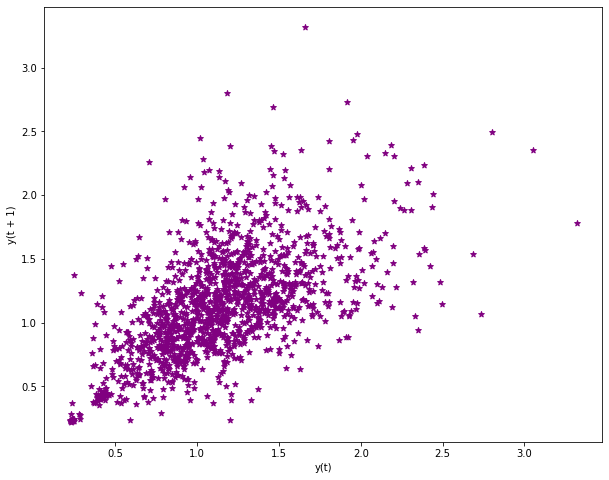

In [24]:
#The plot shows some correlation of present time and future time
plt.figure(figsize = (10,8))
lagplot = lag_plot(lagplot_data, c = 'purple', marker = '*')
lagplot.plot(title = 'Lagplot to check autocorrelation resampled over day')
plt.show()

In [25]:
lagplot_data_df = pd.concat([lagplot_data.shift(-1), lagplot_data], axis = 1)
lagplot_data_df.columns = ['Global_active_power(t)', 'Global_active_power(t+1)']
lagplot_data_corr = lagplot_data_df.corr()
lagplot_data_corr

,Global_active_power(t),Global_active_power(t+1)
Global_active_power(t),1.000000,0.604555
Global_active_power(t+1),0.604555,1.000000


In [26]:
lagplot_data1 = df['Global_active_power'].resample('W').mean()
lagplot_data1.shape

(207,)

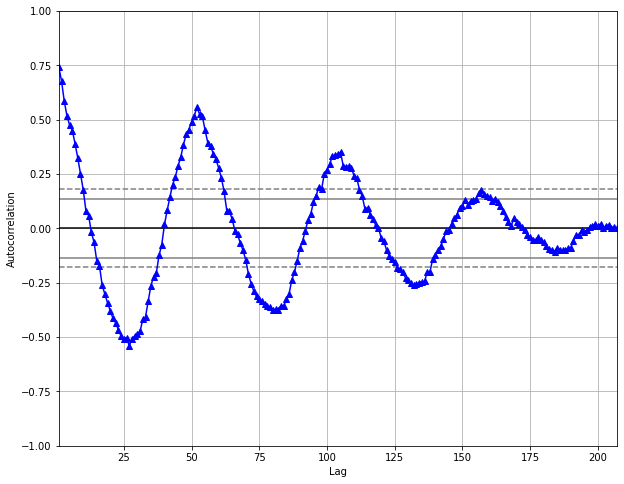

In [27]:
plt.figure(figsize = (10,8))
lagplot1 = autocorrelation_plot(lagplot_data1, c = 'blue', marker = '^')
lagplot1.plot(title = 'Autocorrelation Plot of the Data resampled over Hour')
plt.show()

## Using statsmodel plot_acf and plot_pac

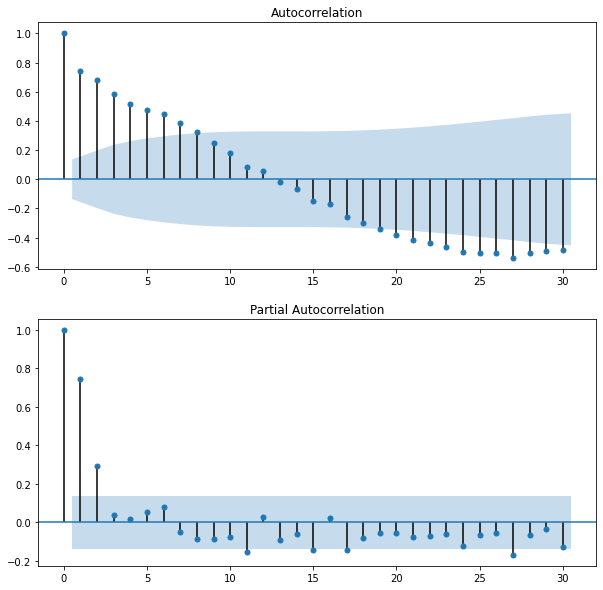

In [28]:
#ACF AND PACF PLOT Shows our p = 7 and q = 1
df1 = df['Global_active_power'].resample('W').agg('mean')
# plots
plt.figure(figsize = (10,10))
lags = 30
# acf
axis = plt.subplot(2, 1, 1)
plot_acf(df1, ax=axis, lags=lags)
# pacf
axis = plt.subplot(2, 1, 2)
plot_pacf(df1, ax=axis, lags=lags)
# show plot
plt.show()

 The length of train and test are 1906669 and 30 respectively
-------------------------------------------------------
Test MSE: 0.00002870
Test RMSE: 0.00535718
-------------------------------------------------------


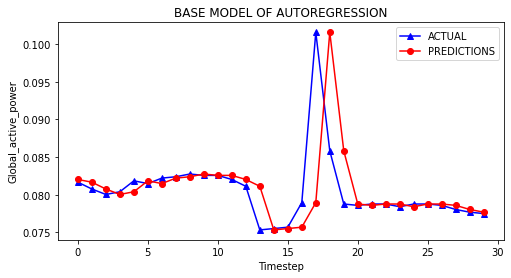

'=======AUTOREGRESSION BASE MODEL DONE======='

In [29]:
#Define the base model and thresholds
def baseARmodel(dataset):
  from pandas import DataFrame
  X = pd.concat([DataFrame(dataset).shift(1), DataFrame(dataset)], axis = 1)
  X.columns = ['Global_active_power(t-1)', 'Global_active_power(t+1)']
  X = X.values
  train, test = X[:len(dataset)-30], X[len(dataset)-30:]
  print(f" The length of train and test are {len(train)} and {len(test)} respectively")
  X_train, y_train = train[:len(train),0], train[:len(train),-1:]

  X_test, y_test = test[:,0], test[:,1]

  # persistence model
  def model_persistence(x):
	  return x
 
  # walk-forward validation
  predictions = list()
  for x in X_test:
	  yhat = model_persistence(x)
	  predictions.append(yhat)
  test_score = mean_squared_error(y_test, predictions)

  print("-------------------------------------------------------")
  print('Test MSE: %.8f' % test_score)
  print('Test RMSE: %.8f' % np.sqrt(test_score))
  print("-------------------------------------------------------")

  # plot predictions vs expected
  plt.figure(figsize=(8,4))
  plt.plot(y_test, color = 'blue',marker = '^', label = 'ACTUAL')
  plt.plot(predictions, color='red', marker = 'o', label = 'PREDICTIONS')
  plt.title("BASE MODEL OF AUTOREGRESSION")
  plt.xlabel('Timestep')
  plt.ylabel('Global_active_power')
  plt.legend()
  plt.show()

  return '=======AUTOREGRESSION BASE MODEL DONE======='
baseARmodel(scaled_data)

========Trainng finished successfully======= 

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:              1906669
Model:                    AutoReg(30)   Log Likelihood             4366976.161
Method:               Conditional MLE   S.D. of innovations              0.024
Date:                Wed, 18 Nov 2020   AIC                             -7.419
Time:                        11:05:33   BIC                             -7.418
Sample:                            30   HQIC                            -7.419
                              1906669                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0020   2.69e-05     75.529      0.000       0.002       0.002
y.L1           1.0040      0.001   1386.431      0.000       1.003       1.005
y.L2 

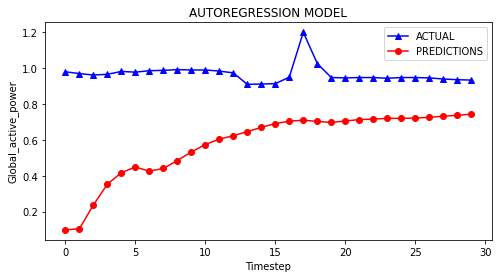

'=======AUTOREGRESSION  DONE======='

In [30]:
def ar_model(dataset):
  """
  Training the data with Auto regression Model
  """
  X = dataset
  train, test = X[:len(X)-30], X[len(X)-30:]

  autoreg = AutoReg(train, lags = 30)
  autoreg_fit = autoreg.fit()

  print("========Trainng finished successfully=======",'\n')
  print(autoreg_fit.summary())
  
  print("============================================================")
  print("Model coefficients are: %s" % autoreg_fit.params)
  print("============================================================")

  # fig = plt.figure(figsize=(16,9))
  # fig = autoreg_fit.plot_diagnostics(fig=fig, lags=30)


  predictions = autoreg.predict(autoreg_fit.params, start = len(train), end = len(train)+len(test)-1, dynamic = True)

  for pred in range(len(predictions)):
    print('predicted_values%f, expected_values=%f' % (predictions[pred], test[pred]))

  test = scaler.inverse_transform(test)
  predictions = scaler.inverse_transform([predictions])
  MSE = mean_squared_error(test, predictions[0])
  RMSE = np.sqrt(MSE)
  print("============================================================")
  print("Test Mean Squred Error: %0.5f" % MSE)
  print("Test Root Mean Squred Error: %0.5f" % RMSE)
  print("============================================================")

  #ig = autoreg_fit.plot_predict(start = len(train), end = len(train)+len(test)-1)

   # plot predictions vs expected
  plt.figure(figsize=(8,4))
  plt.plot(test, color = 'blue',marker = '^', label = 'ACTUAL')
  plt.plot(predictions[0], color='red', marker = 'o', label = 'PREDICTIONS')
  plt.title("AUTOREGRESSION MODEL")
  plt.xlabel('Timestep')
  plt.ylabel('Global_active_power')
  plt.legend()
  plt.show()
  return '=======AUTOREGRESSION  DONE======='

ar_model(scaled_data)

## Data Modeling Using ARIMA Model

ARIMA stands for Autoregressive Integrated Moving Average. It depends on 3 important parametres:
+ Number Autoregression(AR) term paramentre(p)
+ Number of Moving Average(MA) term(q)
+ Number of Difference(d, usually 0 or 1)

### Determing p and q
To determine these terms, we are going to use Autocorrelation Function(ACF) and Partial Autocorrelation Function(PACF) plots from statmodels

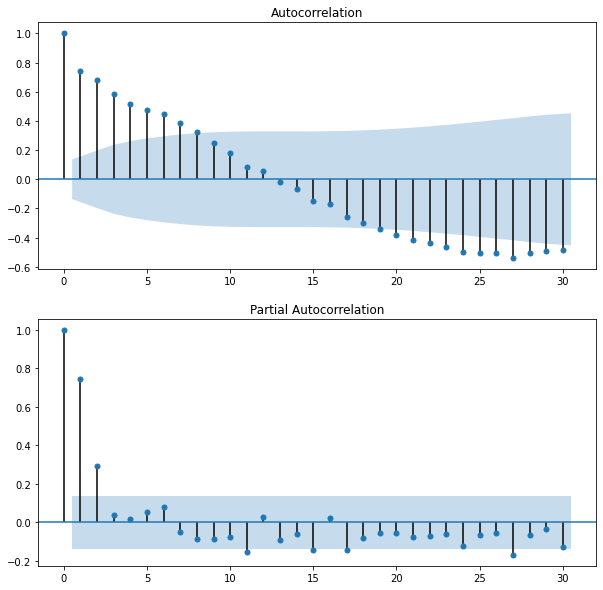

In [31]:
df1 = df['Global_active_power'].resample('W').agg('mean')
# plots
plt.figure(figsize = (10,10))
lags = 30
# acf
axis = plt.subplot(2, 1, 1)
plot_acf(df1, ax=axis, lags=lags)
# pacf
axis = plt.subplot(2, 1, 2)
plot_pacf(df1, ax=axis, lags=lags)
# show plot
plt.show()

In [32]:
df2 = df['Global_active_power'].resample('D').agg('mean')
df2.fillna(df['Global_active_power'].mean(),inplace=True)
df2  = df2.values.reshape(-1,1)

df2_scaled = scaler.fit_transform(df2)

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 1152
Model:                 ARIMA(7, 1, 0)   Log Likelihood                 995.195
Method:                       css-mle   S.D. of innovations              0.102
Date:                Wed, 18 Nov 2020   AIC                          -1972.390
Time:                        11:12:51   BIC                          -1926.947
Sample:                             1   HQIC                         -1955.237
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0001      0.001     -0.153      0.878      -0.002       0.002
ar.L1.D.y     -0.6114      0.029    -20.748      0.000      -0.669      -0.554
ar.L2.D.y     -0.5917      0.034    -17.262      0.0

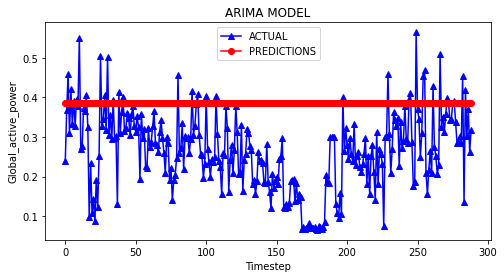

+++++++++++Residual Plot++++++++++


<Figure size 576x288 with 0 Axes>

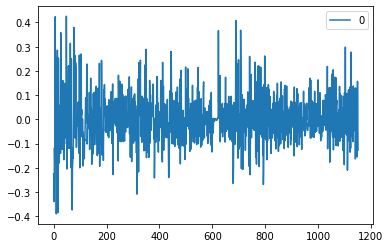

<Figure size 576x288 with 0 Axes>

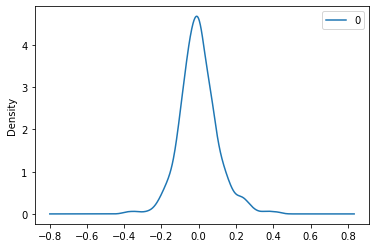

                 0
count  1152.000000
mean     -0.000649
std       0.102309
min      -0.390459
25%      -0.059883
50%      -0.005924
75%       0.054126
max       0.425737


'====ARIMA MODELING DONE===='

In [33]:
# fit the model
def arima_model(dataset):
  
  """
  ARIMA modelling
  #ACF AND PACF PLOT Shows our p = 7, d = 1 and q = 0
  """
  train_size = int(0.8*(len(dataset)))
  train, test = dataset[:train_size], dataset[train_size:len(dataset)]

  train_data = [x for x in train]
  predictions = list()
  y_test = list()

  for tests in range(len(test)):
    model = ARIMA(train_data, order=(7,1,0))
    model_fit = model.fit(disp=0)
    
    forecast = model_fit.forecast()
    yhat = forecast[0]
    predictions.append(yhat)

    y_true = test[tests]
    y_test.append(y_true)
  print(model_fit.summary())
  print("======Training Finished Successfully======")
  print("======Forecasting Finished Successfully======")


  MSE = mean_squared_error(scaler.inverse_transform(y_test), scaler.inverse_transform(predictions))
  RMSE = np.sqrt(MSE)

  print("=====================================================")
  print("Test MSE Error: %0.5f" % MSE)
  print("Test RMSE Error: %0.5f" %RMSE)
  print("=====================================================")

  # plot predictions vs expected
  plt.figure(figsize=(8,4))
  plt.plot(y_test, color = 'blue',marker = '^', label = 'ACTUAL')
  plt.plot(predictions, color='red', marker = 'o', label = 'PREDICTIONS')
  plt.title("ARIMA MODEL")
  plt.xlabel('Timestep')
  plt.ylabel('Global_active_power')
  plt.legend()
  plt.show()

  print("+++++++++++Residual Plot++++++++++")
  # plot residual errors
  residuals = pd.DataFrame(model_fit.resid)
  plt.figure(figsize=(8,4))
  residuals.plot()
  plt.show()
  plt.figure(figsize=(8,4))
  residuals.plot(kind='kde')
  plt.show()
  print(residuals.describe())

  return "====ARIMA MODELING DONE===="
arima_model(df2_scaled)

### Using SARIMAX Model

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                 1153
Model:             SARIMAX([5, 7, 12, 13], 0, 0)   Log Likelihood                 839.799
Date:                           Wed, 18 Nov 2020   AIC                          -1669.597
Time:                                   11:20:01   BIC                          -1644.346
Sample:                                        0   HQIC                         -1660.067
                                          - 1153                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L5          0.2140      0.024      9.018      0.000       0.167       0.260
ar.L7          0.4715      0.022     21.692

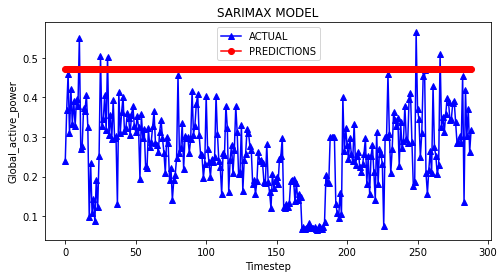

+++++++++++Residual Plot++++++++++


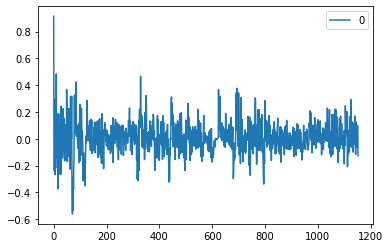

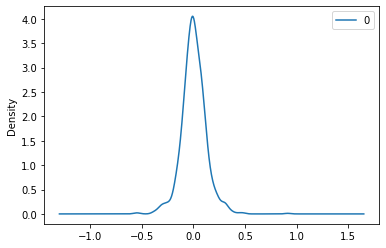

                 0
count  1153.000000
mean      0.005036
std       0.119286
min      -0.560850
25%      -0.061586
50%       0.000361
75%       0.070101
max       0.913834


'====SARIMAX MODELING DONE===='

In [34]:
# fit the model
def sarimax_model(dataset):
  
  """
  SARIMAX modelling
  #ACF AND PACF PLOT Shows our p = 7, d = 1 and q = 0
  """
  train_size = int(0.8*(len(dataset)))
  train, test = dataset[:train_size], dataset[train_size:len(dataset)]

  train_data = [x for x in train]
  predictions = list()
  y_test = list()

  for tests in range(len(test)):
    model = SARIMAX(train_data,order=((7,5,12,13),0, 0))
    model_fit = model.fit(disp=0)
    
    forecast = model_fit.forecast()
    yhat = forecast[0]
    predictions.append(yhat)

    y_true = test[tests]
    y_test.append(y_true)
  print(model_fit.summary())
  print("======Training Finished Successfully======")
  print("======Forecasting Finished Successfully======")


  MSE = mean_squared_error(y_test,predictions)
  RMSE = np.sqrt(MSE)

  print("=====================================================")
  print("Test MSE Error: %0.5f" % MSE)
  print("Test RMSE Error: %0.5f" %RMSE)
  print("=====================================================")

  # plot predictions vs expected
  plt.figure(figsize=(8,4))
  plt.plot(y_test, color = 'blue',marker = '^', label = 'ACTUAL')
  plt.plot(predictions, color='red', marker = 'o', label = 'PREDICTIONS')
  plt.title("SARIMAX MODEL")
  plt.xlabel('Timestep')
  plt.ylabel('Global_active_power')
  plt.legend()
  plt.show()

  print("+++++++++++Residual Plot++++++++++")
  # plot residual errors
  residuals = pd.DataFrame(model_fit.resid)
  residuals.plot()
  plt.show()
  residuals.plot(kind='kde')
  plt.show()
  print(residuals.describe())

  return "====SARIMAX MODELING DONE===="
sarimax_model(df2_scaled)


## Apply LSTM Model
### Long Short-Term Memory (LSTM) networks are a type of artificial recurrent neural network (RNN) known for its robustness in making predictions based on time series data. It has wide feeback connections that allows it to process ordered multiple data points in sequence prediction problems.

### Let's build a Long short-term memory (LSTM) model

=====Converting an array of values into a dataset matrix done successfully===== 

====Reshaping input to be [samples, no_features, time steps] done successfully==== 

(1525328, 1, 30) (381309, 1, 30) (1525328,) (381309,)
Epoch 1/20
21791/21791 [==============================] - 73s 3ms/step - loss: 8.0307e-04 - val_loss: 4.5887e-04
Epoch 2/20
21791/21791 [==============================] - 73s 3ms/step - loss: 7.0565e-04 - val_loss: 4.5947e-04
Epoch 3/20
21791/21791 [==============================] - 73s 3ms/step - loss: 6.9506e-04 - val_loss: 4.2534e-04
Epoch 4/20
21791/21791 [==============================] - 73s 3ms/step - loss: 6.8807e-04 - val_loss: 4.4058e-04
Epoch 5/20
21791/21791 [==============================] - 73s 3ms/step - loss: 6.8435e-04 - val_loss: 4.4037e-04
Epoch 6/20
21791/21791 [==============================] - 72s 3ms/step - loss: 6.8081e-04 - val_loss: 4.2788e-04
Epoch 7/20
21791/21791 [==============================] - 71s 3ms/step - loss: 6.7872e-04 - val_loss:

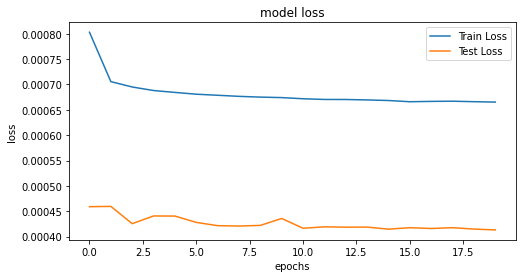

======comparing the actual and predictions for the last 500 minutes======


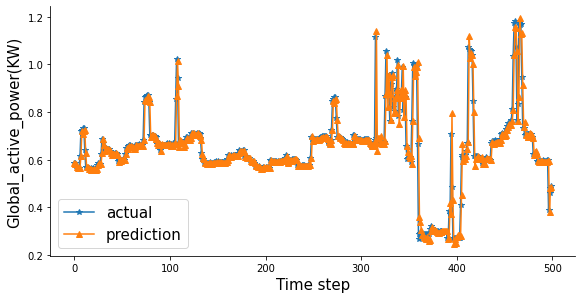

'=====LSTM MODELING DONE====='

In [36]:
# Creating Training and Testing Dataset

def lstm_model(dataset):
    train_size = int(len(dataset)*0.8)
    test_size = int(len(dataset)*0.2)

    train, test = dataset[:train_size,:], dataset[train_size:len(dataset),:]


    print("=====Converting an array of values into a dataset matrix done successfully=====",'\n')
    def create_dataset(dataset, look_back):
        X, Y = [], []
        for i in range(len(dataset)-look_back-1):
            x1 = dataset[i:(i+look_back), 0]
            X.append(x1)
            Y.append(dataset[i + look_back, 0])
        return np.array(X), np.array(Y)
    
    X_train, y_train = create_dataset(train, 30)
    X_test, y_test = create_dataset(test,30)

    print("====Reshaping input to be [samples, no_features, time steps] done successfully====",'\n')
    X_train = X_train.reshape(X_train.shape[0],1,X_train.shape[1])
    X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

    print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

    model = Sequential()
    model.add(LSTM(100, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')

    history = model.fit(X_train, y_train, epochs=20, batch_size=70, validation_data=(X_test, y_test), 
                    callbacks=[EarlyStopping(monitor='val_loss', patience=10)], verbose=1, shuffle=False)

    print(model.summary())

    print("=================Making Prediction=================")

    train_prediction = model.predict(X_train)
    test_prediction = model.predict(X_test)

    #Since we transformed our training and test data, we need to inverse it to get the real predicted values
    train_prediction = scaler.inverse_transform(train_prediction)
    y_train = scaler.inverse_transform([y_train])

    test_prediction = scaler.inverse_transform(test_prediction)
    y_test = scaler.inverse_transform([y_test])

    print("===========Evaluating the Model=============")
    print("--------------------------------------------")
    print("===========Mean Square Error and RMSE=======",'\n')


    print(f"The Train Mean Suared Error is {round(mean_squared_error(y_train[0], train_prediction[:,0]),3)}")
    print(f"The Train Root Mean Suared Error is {round(np.sqrt(mean_squared_error(y_train[0], train_prediction[:,0])),3)}")

    print(f"The Test Mean Suared Error is {round(mean_squared_error(y_test[0], test_prediction[:,0]),3)}")
    print(f"The Test Root Mean Suared Error is {round(np.sqrt(mean_squared_error(y_test[0], test_prediction[:,0])),3)}")

    print("++++++++Ploting Model Loss+++++++++++",'\n')
    plt.figure(figsize=(8,4))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Test Loss')
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epochs')
    plt.legend(loc='best')
    plt.show();

    print("======comparing the actual and predictions for the last 500 minutes======")
    data_list = [x for x in range(500)]
    plt.figure(figsize=(8,4))
    plt.plot(data_list, y_test[0][:500], marker='*', label="actual")
    plt.plot(data_list, test_prediction[:,0][:500], marker = '^', label="prediction")
    plt.tight_layout()
    sns.despine(top=True)
    plt.subplots_adjust(left=0.07)
    plt.ylabel('Global_active_power(KW)', size=15)
    plt.xlabel('Time step', size=15)
    plt.legend(fontsize=15)
    plt.show();
    
    return "=====LSTM MODELING DONE====="
lstm_model(scaled_data)


## Evaluating the Models: MSE AND RMSE PLOT OF VARIOUS MODELS

In [37]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
eval = {"model": ["AR","ARIMA", "SARIMA", "LSTM"],
        "MSE": [0.18820,0.23546, 0.05259,0.004],
        "RMSE":[0.43382, 0.48524, 0.22933,0.063]
      }
models = pd.DataFrame(eval)
models.head()

,model,MSE,RMSE
0,AR,0.18820,0.43382
1,ARIMA,0.23546,0.48524
2,SARIMA,0.05259,0.22933
3,LSTM,0.00400,0.06300


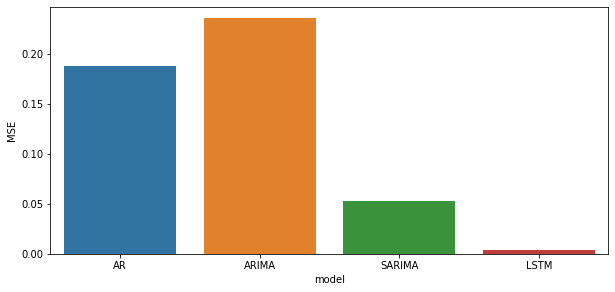

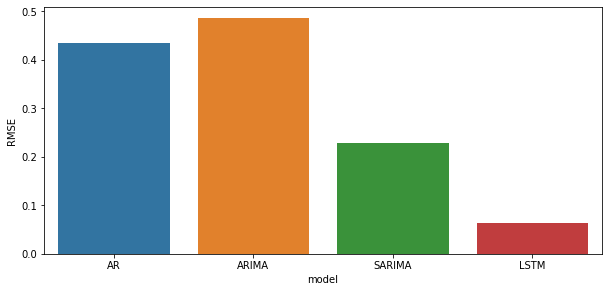

In [38]:
plt.figure(figsize = (10,10))
ax = plt.subplot(2,1,1)
ax = sns.barplot(data = models, x = 'model', y = 'MSE', orient = 'v')
plt.show()
plt.figure(figsize = (10,10))
ax1 = plt.subplot(2,1,2)
ax1 = sns.barplot(data = models, x = 'model', y = 'RMSE', orient = 'v')
plt.show()

# CONCLUSION

## We see that the best model performance was obtained with the Deep Neural Network, LSTM. 

### LSTM Model:
+ Is highly flexible
+ Is highly usable in predictions where there's time lag between input features and target signals, and can capture long-term temporal dependencies without suffering optimization challenges (-- interesting capabilities that will offer improvement on the study to predict regional land subsidence from the input variables).
+ Is suitable for predictions involving large volume datasets -- our model used over 2M data entries.
+ has the ability to figure out or understand hidden pattern in the given dataset.
+ is good for time series modeling because of its recurrent nature(RNN)

### The End